In [62]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [9]:
df = pd.read_csv("../input/titanic/train.csv")

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='Survived', ylabel='count'>

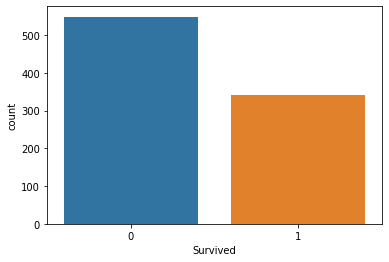

In [12]:
sns.countplot(data=df,x="Survived")

<AxesSubplot:xlabel='Pclass', ylabel='count'>

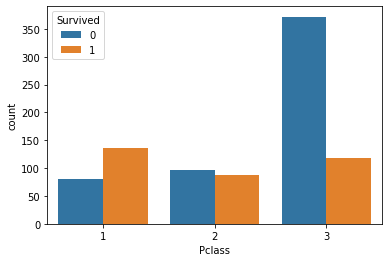

In [13]:
sns.countplot(data=df,x="Pclass",hue="Survived")

<AxesSubplot:xlabel='Sex', ylabel='count'>

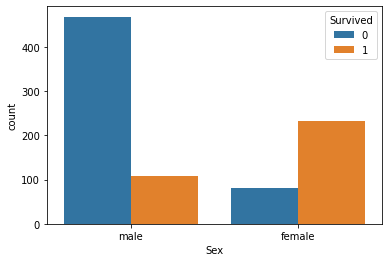

In [14]:
sns.countplot(data=df,x="Sex",hue="Survived")

<AxesSubplot:xlabel='Age', ylabel='Count'>

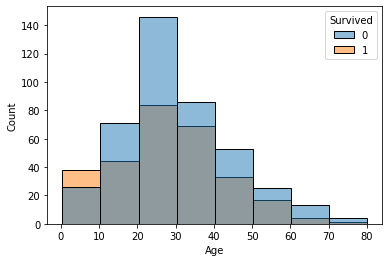

In [15]:
sns.histplot(data=df,x="Age",hue="Survived",bins=8)

<AxesSubplot:xlabel='Survived', ylabel='count'>

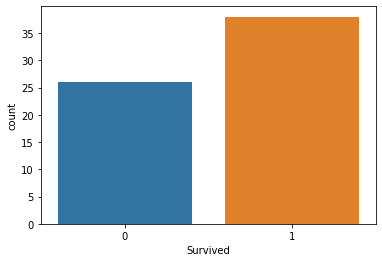

In [16]:
sns.countplot(data=df[df.Age<=10],x="Survived")

<AxesSubplot:xlabel='SibSp', ylabel='count'>

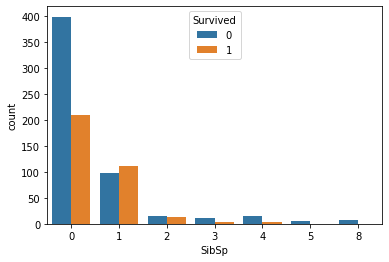

In [17]:
sns.countplot(data=df,x="SibSp",hue="Survived")

<AxesSubplot:xlabel='Parch', ylabel='count'>

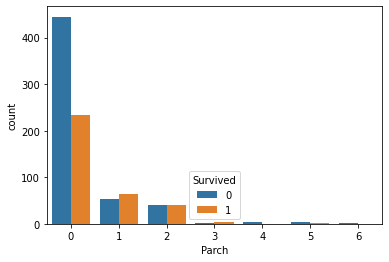

In [18]:
sns.countplot(data=df,x="Parch",hue="Survived")

<AxesSubplot:xlabel='Age', ylabel='Count'>

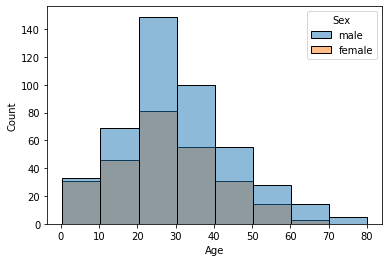

In [19]:
sns.histplot(data=df,x="Age",hue="Sex",bins=8)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

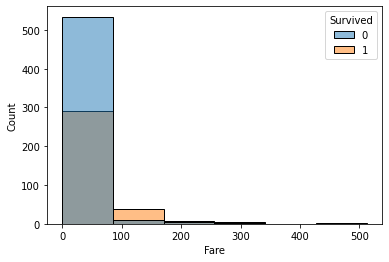

In [20]:
sns.histplot(data=df,x="Fare",hue="Survived",bins=6)

In [21]:
df.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [22]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

<AxesSubplot:xlabel='count', ylabel='Embarked'>

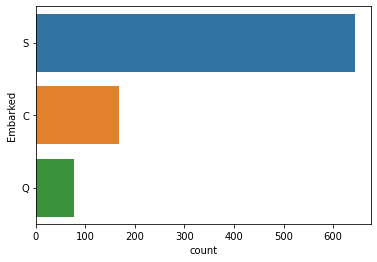

In [23]:
sns.countplot(data=df,y="Embarked")

In [24]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
train1=df.iloc[:,[2,4,6,7,-1]]
train2=df.iloc[:,[5,9]]

In [26]:
train1.isnull().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [27]:
train1 = train1.fillna(method="ffill",axis=0)
train1.Embarked.nunique()

3

<AxesSubplot:xlabel='Age', ylabel='Fare'>

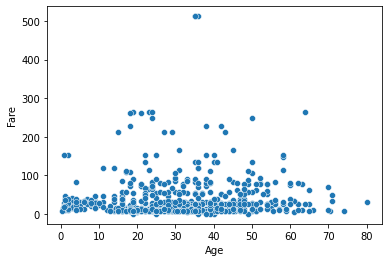

In [28]:
sns.scatterplot(data=train2,x="Age",y="Fare")

In [29]:
train2 = train2.fillna(train2.mean())

In [30]:
def func(tr1,tr2):
    from sklearn.preprocessing import StandardScaler,OneHotEncoder
    sc = StandardScaler()
    ohe = OneHotEncoder()
    t2 = pd.DataFrame(sc.fit_transform(tr2))
    t1 = pd.DataFrame(ohe.fit_transform(tr1).toarray())
    return t1,t2

In [31]:
tra1,tra2 = func(train1,train2)

In [32]:
train = pd.concat([tra1,tra2],axis=1)

In [33]:
train.columns=[a for a in range(0,len(train.columns))]

In [34]:
train

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.592481,-0.502445
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.638789,0.786845
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.284663,-0.488854
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.407926,0.420730
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.407926,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.207709,-0.386671
887,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.823344,-0.044381
888,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,-0.176263
889,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.284663,-0.044381


In [35]:
y = df.Survived

In [36]:
from catboost import CatBoostClassifier

In [37]:
model = CatBoostClassifier(iterations=2000,
                           depth=15,
                           rsm=1,
                           border_count=128
                          )

In [38]:
model.fit(train,y)

Learning rate set to 0.005194
0:	learn: 0.6895056	total: 226ms	remaining: 7m 32s
1:	learn: 0.6860627	total: 258ms	remaining: 4m 18s
2:	learn: 0.6820838	total: 362ms	remaining: 4m
3:	learn: 0.6794321	total: 363ms	remaining: 3m
4:	learn: 0.6758980	total: 392ms	remaining: 2m 36s
5:	learn: 0.6724658	total: 394ms	remaining: 2m 10s
6:	learn: 0.6688603	total: 826ms	remaining: 3m 55s
7:	learn: 0.6654962	total: 894ms	remaining: 3m 42s
8:	learn: 0.6621816	total: 1.3s	remaining: 4m 47s
9:	learn: 0.6586846	total: 1.47s	remaining: 4m 53s
10:	learn: 0.6554383	total: 1.49s	remaining: 4m 29s
11:	learn: 0.6520491	total: 1.53s	remaining: 4m 13s
12:	learn: 0.6487069	total: 1.56s	remaining: 3m 58s
13:	learn: 0.6454531	total: 1.57s	remaining: 3m 42s
14:	learn: 0.6422556	total: 1.98s	remaining: 4m 21s
15:	learn: 0.6392523	total: 1.99s	remaining: 4m 7s
16:	learn: 0.6361473	total: 2.4s	remaining: 4m 39s
17:	learn: 0.6327057	total: 2.8s	remaining: 5m 8s
18:	learn: 0.6311286	total: 2.81s	remaining: 4m 52s
19:	l

In [39]:
test = pd.read_csv("../input/titanic/test.csv")

In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [41]:
te1=test.iloc[:,[1,3,5,6,10]]
te2=test.iloc[:,[4,8]]

In [44]:
te1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pclass    418 non-null    int64 
 1   Sex       418 non-null    object
 2   SibSp     418 non-null    int64 
 3   Parch     418 non-null    int64 
 4   Embarked  418 non-null    object
dtypes: int64(3), object(2)
memory usage: 16.5+ KB


In [47]:
te2=te2.fillna(te2.mean())

In [48]:
test1,test2=func(te1,te2)

In [51]:
test = pd.concat([test1,test2],axis=1)

In [53]:
test.columns=[a for a in range(0,len(test.columns))]

In [54]:
pred = model.predict(test)

In [56]:
pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [59]:
ss = pd.read_csv("../input/titanic/gender_submission.csv")
ss

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [61]:
df=pd.DataFrame({"PassengerId":ss.PassengerId,"Survived":pred})

In [65]:
df.to_csv("./sub.csv",index=False)